In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('economic_index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unnecessary column
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

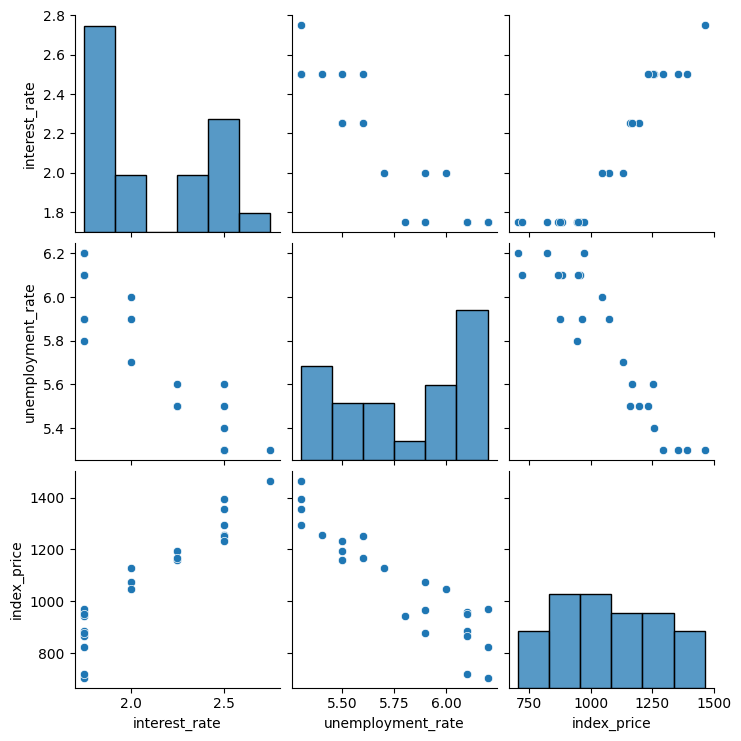

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

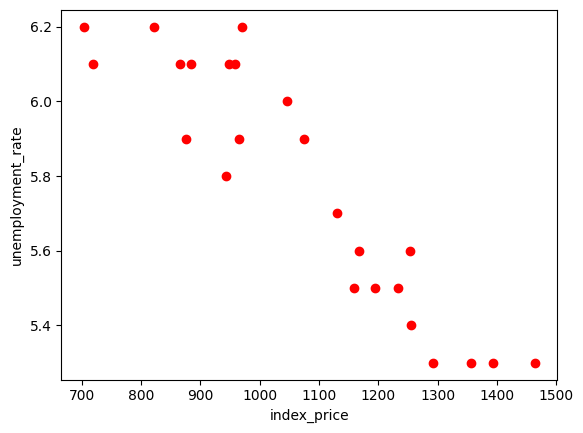

In [10]:
plt.scatter(df['index_price'],df['unemployment_rate'],color='r')
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')

In [11]:
X=df[['interest_rate','unemployment_rate']]
Y=df['index_price']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

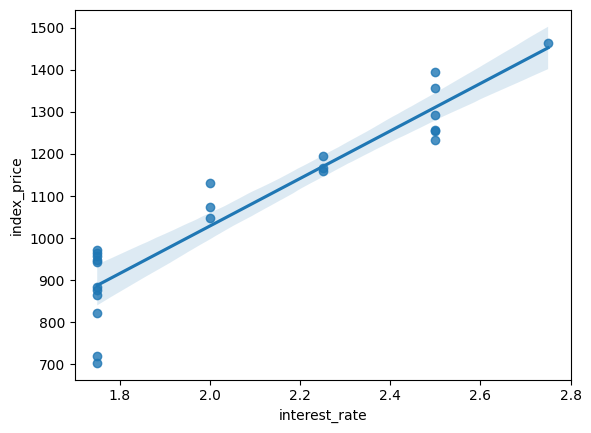

In [13]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

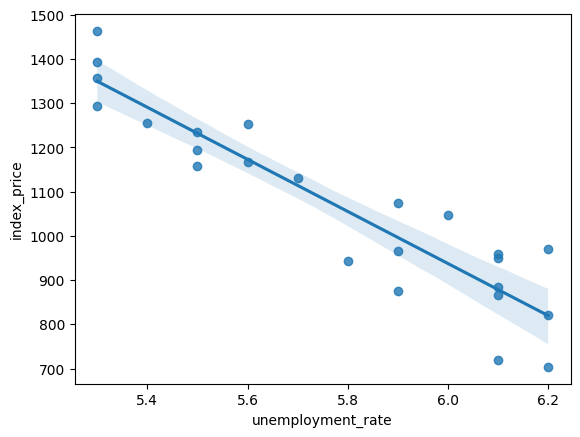

In [14]:
sns.regplot(x=df["unemployment_rate"],y=df["index_price"])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score
cross_validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)


In [20]:
np.mean(cross_validation_score)

np.float64(-5914.828180162386)

In [21]:
y_pred=regression.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
rscore=r2_score(Y_test,y_pred)
print(mse,mae,rmse,rscore)


5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145


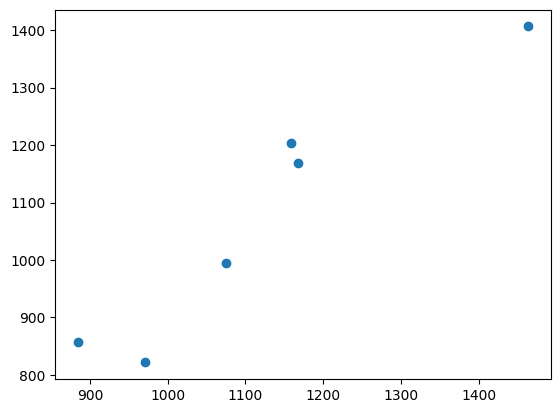

In [23]:
plt.scatter(Y_test,y_pred)

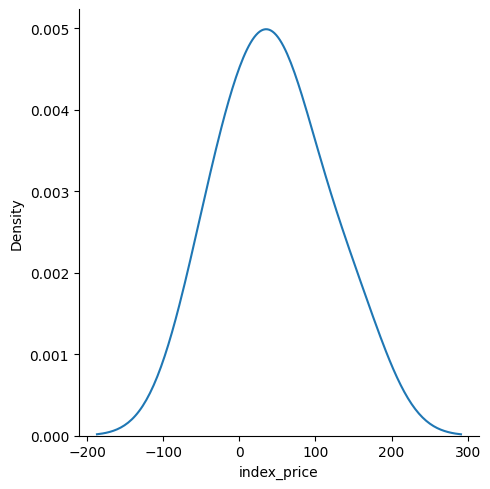

In [24]:
residuals=Y_test-y_pred
sns.displot(residuals,kind='kde')

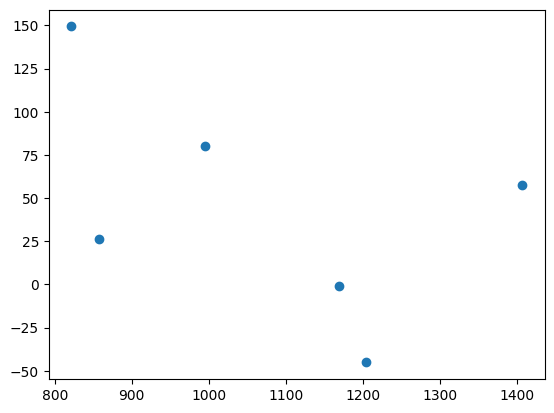

In [25]:
plt.scatter(y_pred,residuals)

In [26]:
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [27]:
prediction=model.predict(X_test)

In [29]:
model.summary()

e:\MACHINE LEARNING\env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 22 Jun 2025   Prob (F-statistic):                       0.754
Time:                        23:17:32   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
regression.coef_

array([  88.27275507, -116.25716066])